# __The Sparks Foundation Data Science and AI Internship__
## Task 1: Linear Regression with 2 variables
### Predict the score, if student studies for 9.25 hours
#### __Steps__:
<ol>
    <li> Import Libraries and Data </li>
    <li> Visualize the Data     </li>
    <li>Prepare the data</li>
    <li>Train the model</li>
    <li>Fit on the model</li>
    <li>Predict</li>
</ol>

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# and importing data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### _Visualizing the data using Seaborn as sns_

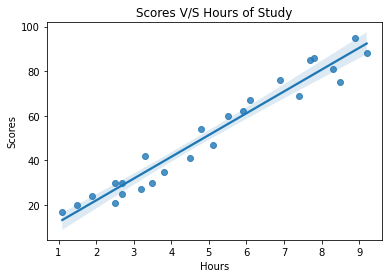

In [4]:
sns.regplot(data=data,x="Hours",y="Scores")
plt.title("Scores V/S Hours of Study")
plt.show()

### Understaning the correlation

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


"So, There is a high +ve correlation of score in exams i.e 0.9762 to hours of study"

### _Spliting the  data into Inputs and Outputs_

In [5]:
X = data["Hours"].values.reshape(-1,1)
y = data["Scores"].values.reshape(-1,1)

### _Training and Testing Data_

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y ,train_size=0.7,random_state=42)

### _Creating a Linear Regreesion model __reg__ and training it using fit_ 

In [7]:
reg = LinearRegression()
reg.fit(Xtrain,Ytrain)
print("Model Trained")

Model Trained


### _Predicting the Values_

In [8]:
y_predict = reg.predict(Xtest)
y_predict.shape

(8, 1)

### _Comparing Predicted Values With Actual Values_

In [9]:
new_df = pd.DataFrame({'Actual':Ytest.flatten(),'Predicted':y_predict.flatten()})
new_df

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


### _Now, Let predict what will be the score, if student studies 9.25 hrs_

In [11]:
hours = np.array(9.25).reshape(-1,1)
predicted = reg.predict(hours)
print(f'''
No of Hours:{hours.flatten()[0]}
Marks predicted: {predicted.flatten()[0]}''')


No of Hours:9.25
Marks predicted: 92.61670033840096


### _Evaluate the model_ 

In [12]:
print("R^2: {}".format(reg.score(Xtest,Ytest)))
rmse = np.sqrt(mean_squared_error(Ytest,y_predict))
print("Root mean squared error: {}".format(rmse))

R^2: 0.9487647340257012
Root mean squared error: 4.859985351228103
